Data point 1: Latitude=-12.294603411475, Longitude=-55.711505115116, Timestamp=2024-07-03 21:11:09
Data point 2: Latitude=-12.894883584905, Longitude=-55.258414929946, Timestamp=2024-07-03 21:11:21
Data point 3: Latitude=-13.444247496301, Longitude=-54.840994936682, Timestamp=2024-07-03 21:11:32
Data point 4: Latitude=-14.092332223796, Longitude=-54.344976917588, Timestamp=2024-07-03 21:11:45
Data point 5: Latitude=-14.63968414027, Longitude=-53.922867143083, Timestamp=2024-07-03 21:11:57
Data point 6: Latitude=-15.235664412376, Longitude=-53.459755103935, Timestamp=2024-07-03 21:12:08
Data point 7: Latitude=-15.78090161135, Longitude=-53.032716791246, Timestamp=2024-07-03 21:12:19
Data point 8: Latitude=-16.374474867234, Longitude=-52.563990489504, Timestamp=2024-07-03 21:12:31
Data point 9: Latitude=-16.917406728745, Longitude=-52.131589639579, Timestamp=2024-07-03 21:12:42
Data point 10: Latitude=-17.508361694672, Longitude=-51.656769401225, Timestamp=2024-07-03 21:12:54
Data point 

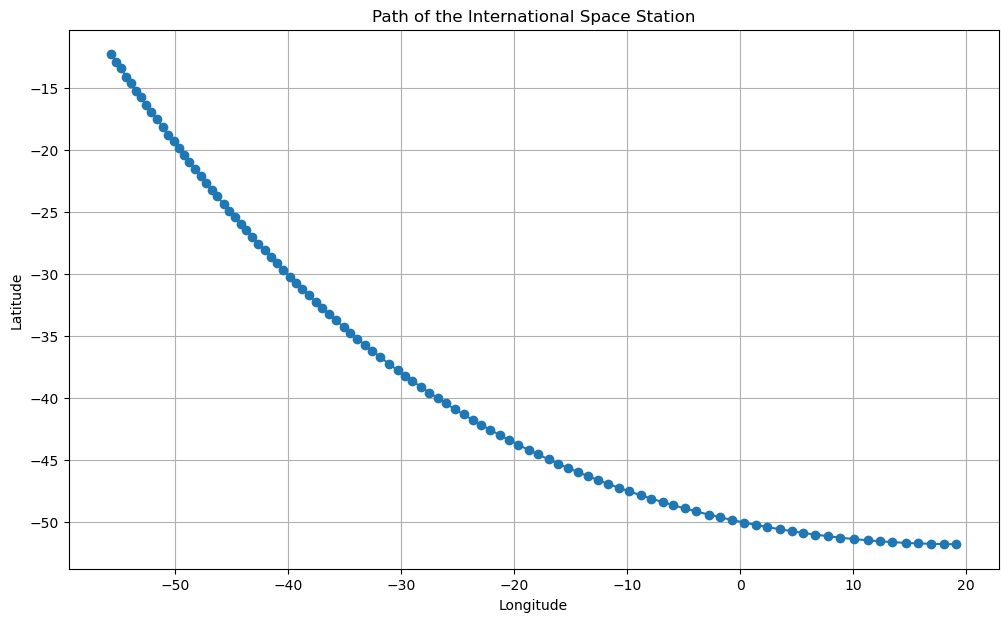

In [3]:
import requests 
import time
import datetime
import matplotlib.pyplot as plt

#API endpoint 
url = "https://api.wheretheiss.at/v1/satellites/25544"

latitudes = []
longitudes = []
timestamps = []

for i in range(100):
    try:
        # Send request and handle potential errors
        response = requests.get(url)
        response.raise_for_status() 

        # Extract data from JSON response
        data = response.json()
        latitude = data["latitude"]
        longitude = data["longitude"]
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(timestamp)

        # Print the data points
        print(f"Data point {i+1}: Latitude={latitude}, Longitude={longitude}, Timestamp={timestamp}")

    except requests.exceptions.RequestException as i:
        print(f"Failed to receive ISS location: {i}")

    time.sleep(10)

# Plot 
%matplotlib inline

# Configure plot
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(longitudes, latitudes, marker='o', linestyle="-")

# Labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Path of the International Space Station")
ax.grid(True)

# Show the plot
plt.show()